In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel("ExampleDataSet.xlsx")
X = df[['IQ','Work Experience']]
df

,IQ,Work Experience
0,83,0
1,85,2
2,85,4
3,86,4
4,93,4
...,...,...
95,125,12
96,140,13
97,124,10
98,124,12


In [3]:
# Calculate no.of cluster we need
wcss = []

for i in range(1,11) :
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

wcss

C:\Users\BAPS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\BAPS\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[35688.75,
 6614.5,
 4171.835104669887,
 2604.80358974359,
 2199.6900183150183,
 1577.8540793159373,
 1459.4390802675587,
 775.835020371785,
 660.889047064047,
 558.7022338772339]

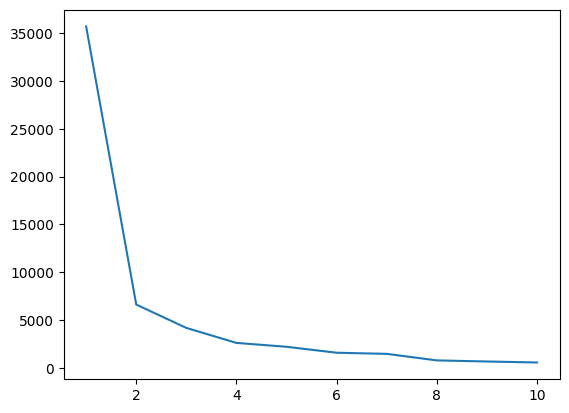

In [4]:
plt.plot(range(1,11),wcss)
plt.show()


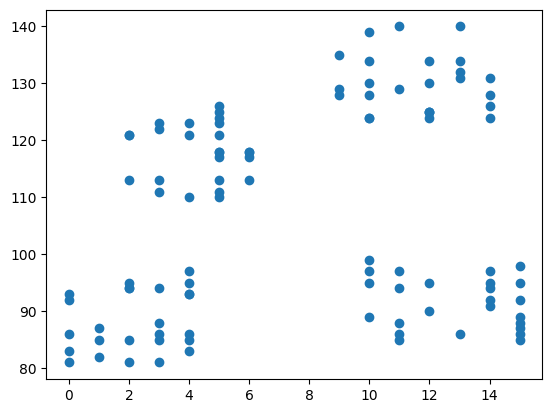

In [5]:

plt.scatter(df['Work Experience'],df['IQ'],)
plt.show()

In [6]:
# Initialize KMeans with the number of clusters (let's choose K=5 for this example)
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model to the scaled data
kmeans.fit(df)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

[2 2 2 2 1 1 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[[117.66666667   4.33333333]
 [ 92.27272727  10.51515152]
 [ 85.23529412   1.82352941]
 [129.80769231  11.30769231]]


In [7]:
df['Cluster'] = labels
df

,IQ,Work Experience,Cluster
0,83,0,2
1,85,2,2
2,85,4,2
3,86,4,2
4,93,4,1
...,...,...,...
95,125,12,3
96,140,13,3
97,124,10,3
98,124,12,3


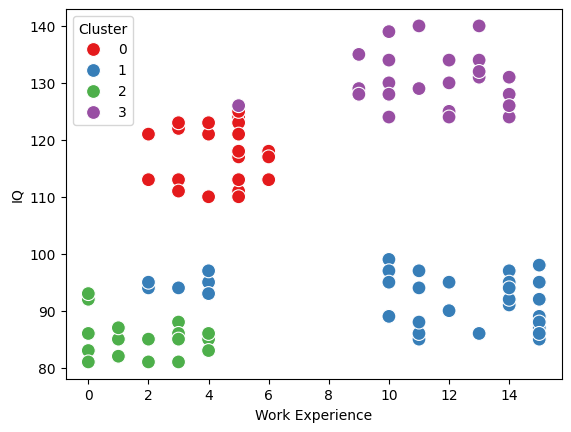

In [8]:
sns.scatterplot(x=df['Work Experience'], y=df['IQ'], 
                hue=df['Cluster'], palette='Set1', s=100)
plt.show()

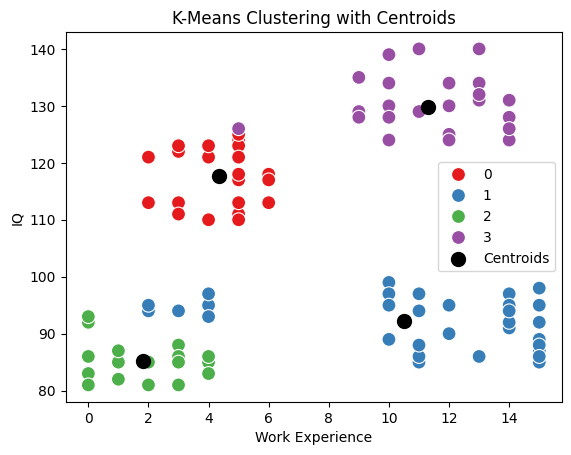

In [9]:
sns.scatterplot(x=df['Work Experience'], y=df['IQ'], 
                hue=df['Cluster'], palette='Set1', s=100)

plt.scatter(centroids[:, 1], centroids[:, 0], s=100, c='black', marker='o', label='Centroids')

plt.title('K-Means Clustering with Centroids')
plt.xlabel('Work Experience')
plt.ylabel('IQ')
plt.legend()
plt.show()